In [3]:
!unzip /content/coil-20-proc.zip

Archive:  /content/coil-20-proc.zip
 extracting: coil-20-proc/obj10__1.png  
 extracting: coil-20-proc/obj10__10.png  
 extracting: coil-20-proc/obj10__11.png  
 extracting: coil-20-proc/obj10__12.png  
 extracting: coil-20-proc/obj10__13.png  
 extracting: coil-20-proc/obj10__14.png  
 extracting: coil-20-proc/obj10__15.png  
 extracting: coil-20-proc/obj10__16.png  
 extracting: coil-20-proc/obj10__17.png  
 extracting: coil-20-proc/obj10__18.png  
 extracting: coil-20-proc/obj10__19.png  
 extracting: coil-20-proc/obj10__2.png  
 extracting: coil-20-proc/obj10__20.png  
 extracting: coil-20-proc/obj10__21.png  
 extracting: coil-20-proc/obj10__22.png  
 extracting: coil-20-proc/obj10__23.png  
 extracting: coil-20-proc/obj10__24.png  
 extracting: coil-20-proc/obj10__25.png  
 extracting: coil-20-proc/obj10__26.png  
 extracting: coil-20-proc/obj10__27.png  
 extracting: coil-20-proc/obj10__28.png  
 extracting: coil-20-proc/obj10__29.png  
 extracting: coil-20-proc/obj10__3.png  
 

In [2]:
!mv /content/Content-Image-Retrival/coil-20-proc.zip /content/

Cloning into 'Content-Image-Retrival'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [4]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline


In [5]:
pwd

'/content'

In [6]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'content'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "coil-20-proc")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))



In [7]:
images[0:5]

['/content/coil-20-proc/obj5__31.png',
 '/content/coil-20-proc/obj7__43.png',
 '/content/coil-20-proc/obj11__18.png',
 '/content/coil-20-proc/obj2__51.png',
 '/content/coil-20-proc/obj8__19.png']

['/content/coil-20-proc/obj4__24.png',
 '/content/coil-20-proc/obj6__36.png',
 '/content/coil-20-proc/obj16__32.png']

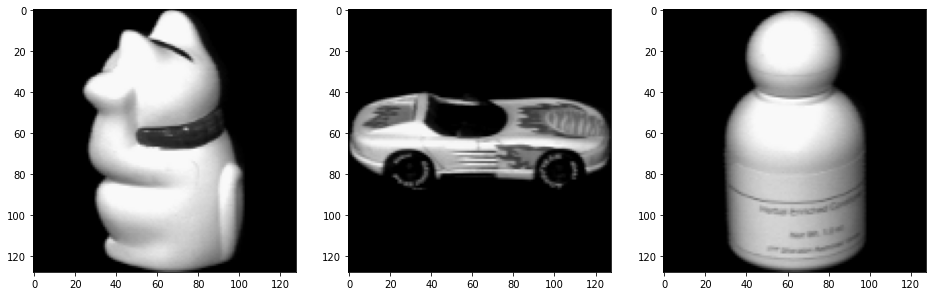

In [8]:
r = random.sample(images, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));    

In [22]:
def proc_images():
   

    x = []
    y = [] # images as arrays
    
    WIDTH = 36
    HEIGHT = 36

    for img in images:
        base = os.path.basename(img)
        

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_LINEAR))
        y.append(base)
        

    return x,y

In [23]:
# for img in images[0:4]:
#   base = os.path.basename(img)
#   print(base)

In [24]:
x,y = proc_images()

In [27]:
# Set it up as a dataframe if you like
df = pd.DataFrame()
df["images"]=x
df['filenames']=y

In [28]:
print(len(df), df.images[0].shape)

1440 (36, 36, 3)


In [30]:
np.savez("image", x)
np.savez('filenames',y)

In [31]:
# Load npz file containing image arrays
x_npz = np.load("/content/image.npz")
x = x_npz['arr_0']
# Load npz file containing image filenames
y_npz = np.load("/content/filenames.npz")
y = y_npz['arr_0']


In [ ]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
# X_train, X_valtest = train_test_split(x, test_size=0.2, random_state=1)

In [32]:
X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1)


In [35]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)

(1152, 36, 36, 3)
(1152,)


In [36]:
print(np.array(X_valtest).shape)
print(np.array(y_valtest).shape)


(288, 36, 36, 3)
(288,)


In [37]:
#Get Euclidean Distances between images
l2distance = [np.sqrt(np.sum(np.square(np.subtract(test, train)))) for train in X_train for test in X_valtest]

In [50]:
list_of_gallary_images_n_test_images= []

for test in y_valtest:
  for train in y_train:
    list_of_gallary_images_n_test_images.append((test,train))




In [68]:
random_distances = random.sample(list(enumerate(list_of_gallary_images_n_test_images)),5)
for x,(y,z) in random_distances:
  print("The distance between test image (probe) {y} and train image (gallery) {z} is {x}".format(x=l2distance[x],y=y,z=z))



The distance between test image (probe) obj19__12.png and train image (gallery) obj20__41.png is 555.3269307354002
The distance between test image (probe) obj6__37.png and train image (gallery) obj13__67.png is 584.8230501613288
The distance between test image (probe) obj17__48.png and train image (gallery) obj8__27.png is 535.6603401410263
The distance between test image (probe) obj14__31.png and train image (gallery) obj7__58.png is 597.198459475575
The distance between test image (probe) obj13__21.png and train image (gallery) obj14__68.png is 565.4210820264841


In [69]:
list_of_gallary_images_n_test_images[5]

('obj6__0.png', 'obj9__41.png')

In [73]:
#The distances between each test images and gallary images in csv format
test_images = [x for (x,y) in list_of_gallary_images_n_test_images]
train_images = [y for (x,y) in list_of_gallary_images_n_test_images]
distances = l2distance
all_distances = pd.DataFrame({'Test_image':test_images,"Gallary_images":train_images,"Distance":distances})
all_distances.to_csv("All_Distances.csv",index=False)

In [75]:
print("Displayed list of all test (probe) images")
print(all_distances['Test_image'].unique())

Displayed list of all test (probe) images
['obj6__0.png' 'obj11__32.png' 'obj5__47.png' 'obj3__51.png'
 'obj5__50.png' 'obj9__51.png' 'obj3__57.png' 'obj5__16.png'
 'obj12__3.png' 'obj5__20.png' 'obj8__63.png' 'obj17__59.png'
 'obj10__57.png' 'obj9__61.png' 'obj7__28.png' 'obj5__9.png'
 'obj1__34.png' 'obj17__48.png' 'obj12__41.png' 'obj15__18.png'
 'obj8__30.png' 'obj8__53.png' 'obj7__62.png' 'obj7__21.png'
 'obj7__49.png' 'obj17__45.png' 'obj13__4.png' 'obj4__12.png'
 'obj15__55.png' 'obj11__48.png' 'obj20__26.png' 'obj10__33.png'
 'obj15__44.png' 'obj5__12.png' 'obj1__35.png' 'obj20__60.png'
 'obj2__34.png' 'obj4__18.png' 'obj1__7.png' 'obj20__10.png'
 'obj8__54.png' 'obj4__58.png' 'obj15__59.png' 'obj8__26.png'
 'obj6__29.png' 'obj14__57.png' 'obj14__66.png' 'obj18__37.png'
 'obj20__2.png' 'obj4__21.png' 'obj2__26.png' 'obj13__46.png'
 'obj16__55.png' 'obj13__55.png' 'obj19__43.png' 'obj17__15.png'
 'obj3__3.png' 'obj2__2.png' 'obj20__7.png' 'obj18__42.png'
 'obj19__38.png' 'obj10_

Select test image: (for eg: obj11__12.png ): obj11__12.png


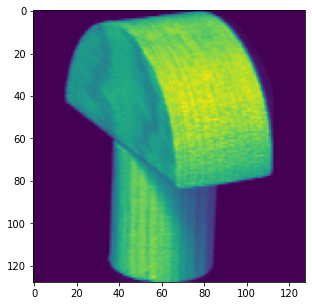

In [124]:
select_test_image = input("Select test image: (for eg: obj11__12.png ): ")
# Matplotlib black magic
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('/content/coil-20-proc/'+select_test_image)
# <something gets done here>
plt.figure(figsize=(5,5))
plt.imshow(image)
# plt.figure(figsize=(16,16))
# plt.subplot(131)
# plt.imshow(cv2.imread('/content/coil-20-proc/'+select_test_image))

In [132]:
all_images = all_distances[all_distances['Test_image']==select_test_image]
all_images.reset_index()
top_10_images = all_images.sort_values(by=['Distance'],ascending=True).head(10)['Gallary_images']
top_10_nearest_distance = all_images.sort_values(by=['Distance'],ascending=True).head(10)['Distance']

Top 10 nearest images in the gallery from the obj11__12.png:


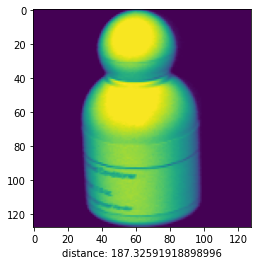

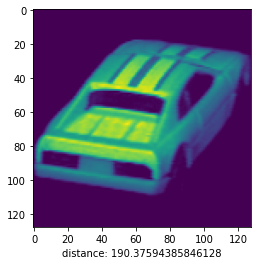

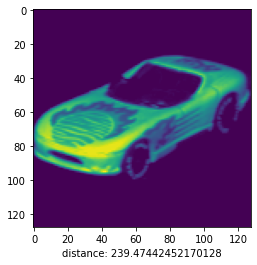

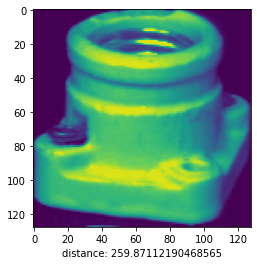

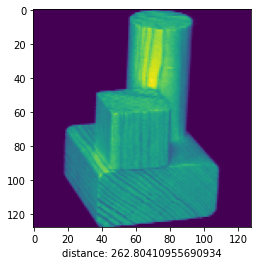

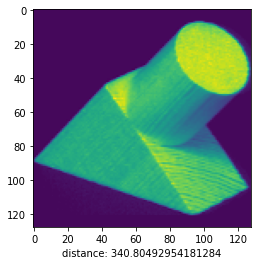

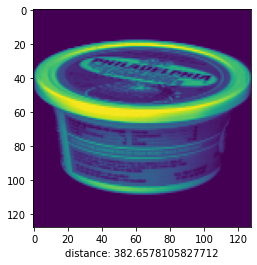

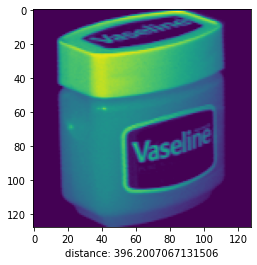

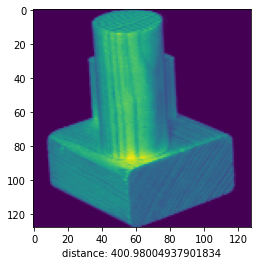

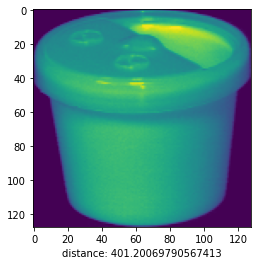

In [134]:
print("Top 10 nearest images in the gallery from the {image}:".format(image=select_test_image))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename,distance):
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.xlabel('distance: %s'%distance)
    plt.imshow(image)

for file,distance in zip(top_10_images,top_10_nearest_distance):
    process('/content/coil-20-proc/'+file,distance)